# La bibliotheque quantique

*Rappel :*
Bob à subit une malédiction et seul un livre peut nous donner son remede. A la bibnliotheque quantique 4 livres sont disponible de maniere aléatoire avec le remese et 3 autres malédiction.
Le but ici est de reussir a trouver un moyen d'avoir le plus de chance d'obtenir le remede

*Au préalable:*
Les 4 livres sont numeroter de 0 à 3 et donc sous la forme binaire de 00 à 11
ainsi les livres peuvent être représneter par 2 qbit , 1 pour le premier bit de la valeur du livre et le 2eme qbit pour la deuxieme valeur

In [1]:
#librairie necessaire
import numpy as np
from qiskit import *

On créer un circuit de 2 qbit pour les valeurs possibles de livres
Et on applique une porte Hadamard à chaque qbit pour definir la valeur du livre comme aleatoire

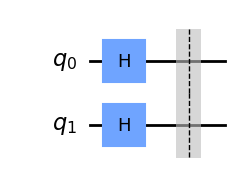

In [2]:
# on créer un circuit de 2 Qbit, 1 par byte definisant la valleur du livre
enig = QuantumCircuit(2) 

# on met une porte Hadamard sur les 2 qbit pour avoir un effet aléatoire lors de la saisie du livre
enig.h(0)
enig.h(1)

enig.barrier()

enig.draw('mpl')

On fait appel ensuite à un oracle qui peut inverser la phase quantique du bon livre
Ici on applique l'oracle pour le livre 2 mais il ets possible de touss les faire et voici les porte a faire pour les autres choix

![title](image.png)

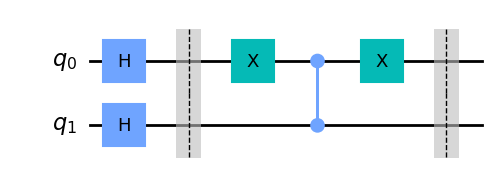

In [3]:
# on fait une porte de controle Z pour inverser la phase quantique et deux porte x car on a choisi le livre 2 10 et donc changer le 0 en 1 pour appliquer la porte de controle Z puis remettre la valeur dans sa position initial

enig.x(0)

enig.cz(0,1)

enig.x(0)

enig.barrier()
enig.draw('mpl')

On applique le princi du diffuseur qui avec l'algorythme de grover va permettre d'avvoir des interferance qui une fois toute annuler vons laisser apparaitre le remede

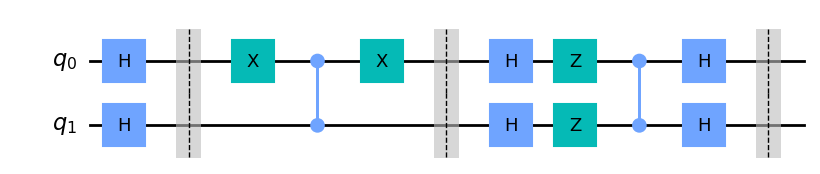

In [4]:
# on applique un diffusuer qui va ainsi appliquer l'Algorithme de Grover et ainsi avec toute les interferance, elles sont s'annuler pour ne laiccer qu ele bon livre comme resultat


enig.h(0)
enig.h(1)
enig.z(0)
enig.z(1)
enig.cz(0,1)
enig.h(0)
enig.h(1)
enig.barrier()

enig.draw('mpl')

Et on tremrine avec l'avant dernier participant qui va ensuite permettre au dernier participant de connaitre ca reponse

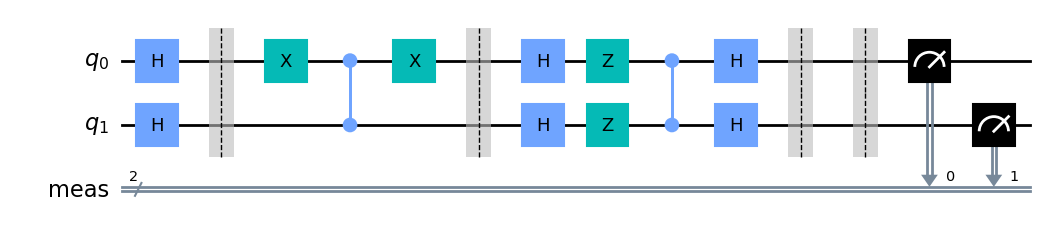

In [5]:
# on ajoute des prise de mesure sur chaque Qbit pour voir le resultat
enig.measure_all() 
enig.draw('mpl')

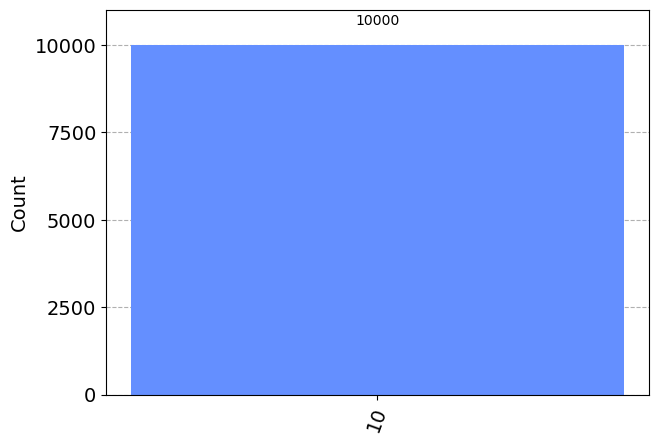

In [6]:
#on faire un compte de 10000 itération pour avoir un échantillon large et étudier les résultats
from qiskit import Aer
from qiskit.visualization import plot_histogram
meas = QuantumCircuit(2,2)
meas.measure([0, 1], [0, 1])

backend = BasicAer.get_backend('qasm_simulator')
enig = enig.compose(meas)
result = backend.run(transpile(enig, backend), shots=10000).result()
counts = result.get_counts()
plot_histogram(counts)

# **Interprétation des résultats**

On voit que les résultat sont répartit de maniere unanime à l'unique résultat qui est le livre contennat le remede

Pour rappel on lit les Qbit de droite a gauche donc le resultat obtenue de 10 coorespond bien au livre 2 que nous avons choisie

Ainsi ce la nous permert d'avoir une grande probabilité du livre contenent le remede de BOB